In [160]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
#from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
#from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.generalized_estimating_equations import GLM
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [136]:
df = pd.read_csv('../data/raw/startup data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [3]:
df1 = df.iloc[:,:10]
df2 = df.iloc[:,11:22]
df3 = df.iloc[:,23:34]
df4 = df.iloc[:,34:]

In [137]:
df1.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0


In [138]:
df2.head()

,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones
0,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3
1,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1
2,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2
3,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1
4,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1


In [139]:
df3.head()

,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising
0,1,0,0,0,0,music,0,0,0,0,0
1,1,0,0,0,0,enterprise,0,0,0,1,0
2,1,0,0,0,0,web,0,1,0,0,0
3,1,0,0,0,0,software,1,0,0,0,0
4,1,0,0,0,0,games_video,0,0,0,0,0


In [140]:
df4.head()

,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [142]:
df_slice = df.loc[: ,['name','funding_total_usd','is_top500','category_code']]
df_slice.head()

,name,funding_total_usd,is_top500,category_code
0,Bandsintown,375000,0,music
1,TriCipher,40100000,1,enterprise
2,Plixi,2600000,1,web
3,Solidcore Systems,40000000,1,software
4,Inhale Digital,1300000,1,games_video


In [143]:
df[df['funding_total_usd'] == df_slice['funding_total_usd'].max()]
df_slice['funding_total_usd'].max()
remove_outlier_lowcapital_companies = df_slice[df_slice['funding_total_usd'] < 20000000]
remove_outlier_bigcapital_companies = df[(df['funding_total_usd'] < 500000000)]

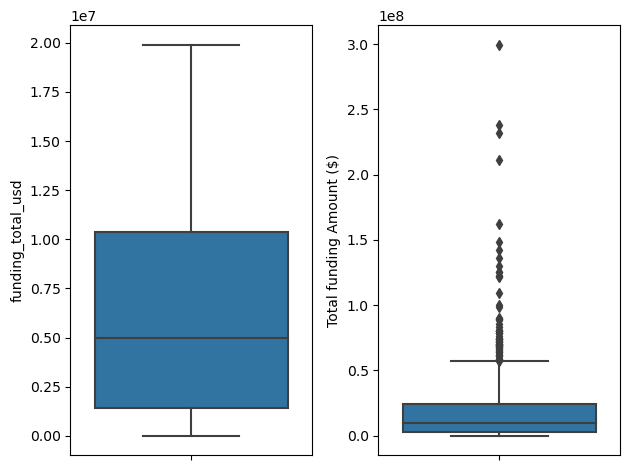

In [145]:
#outlier removed --> > $2M 
fig, ax = plt.subplots(1,2)
sns.boxplot(ax=ax[0], data=remove_outlier_lowcapital_companies, y=remove_outlier_lowcapital_companies['funding_total_usd'])
sns.boxplot(ax=ax[1], data=remove_outlier_bigcapital_companies, y=remove_outlier_bigcapital_companies['funding_total_usd'])
plt.tight_layout()
plt.ylabel('Total funding Amount ($)');


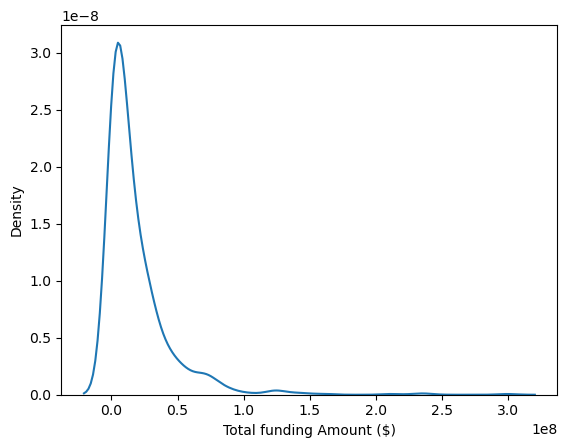

In [146]:
#sns.kdetplot(data=remove_outlier_bigcapital_companies,x=remove_outlier_bigcapital_companies['funding_total_usd']);
#similar to exponential distribution 
sns.kdeplot(data=remove_outlier_bigcapital_companies, x='funding_total_usd')
plt.xlabel('Total funding Amount ($)');

In [147]:
from statistics import mode
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.express as px
dicti = {'funding_total_usd' : 'Funding Total "$"',"first_funding_at" : "Funding Year" }
fig = px.scatter_mapbox(remove_outlier_bigcapital_companies, lat="latitude", lon="longitude", hover_name="name",size="funding_total_usd", hover_data=["funding_total_usd", "first_funding_at", "category_code"],
color="status",
zoom=2.5, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


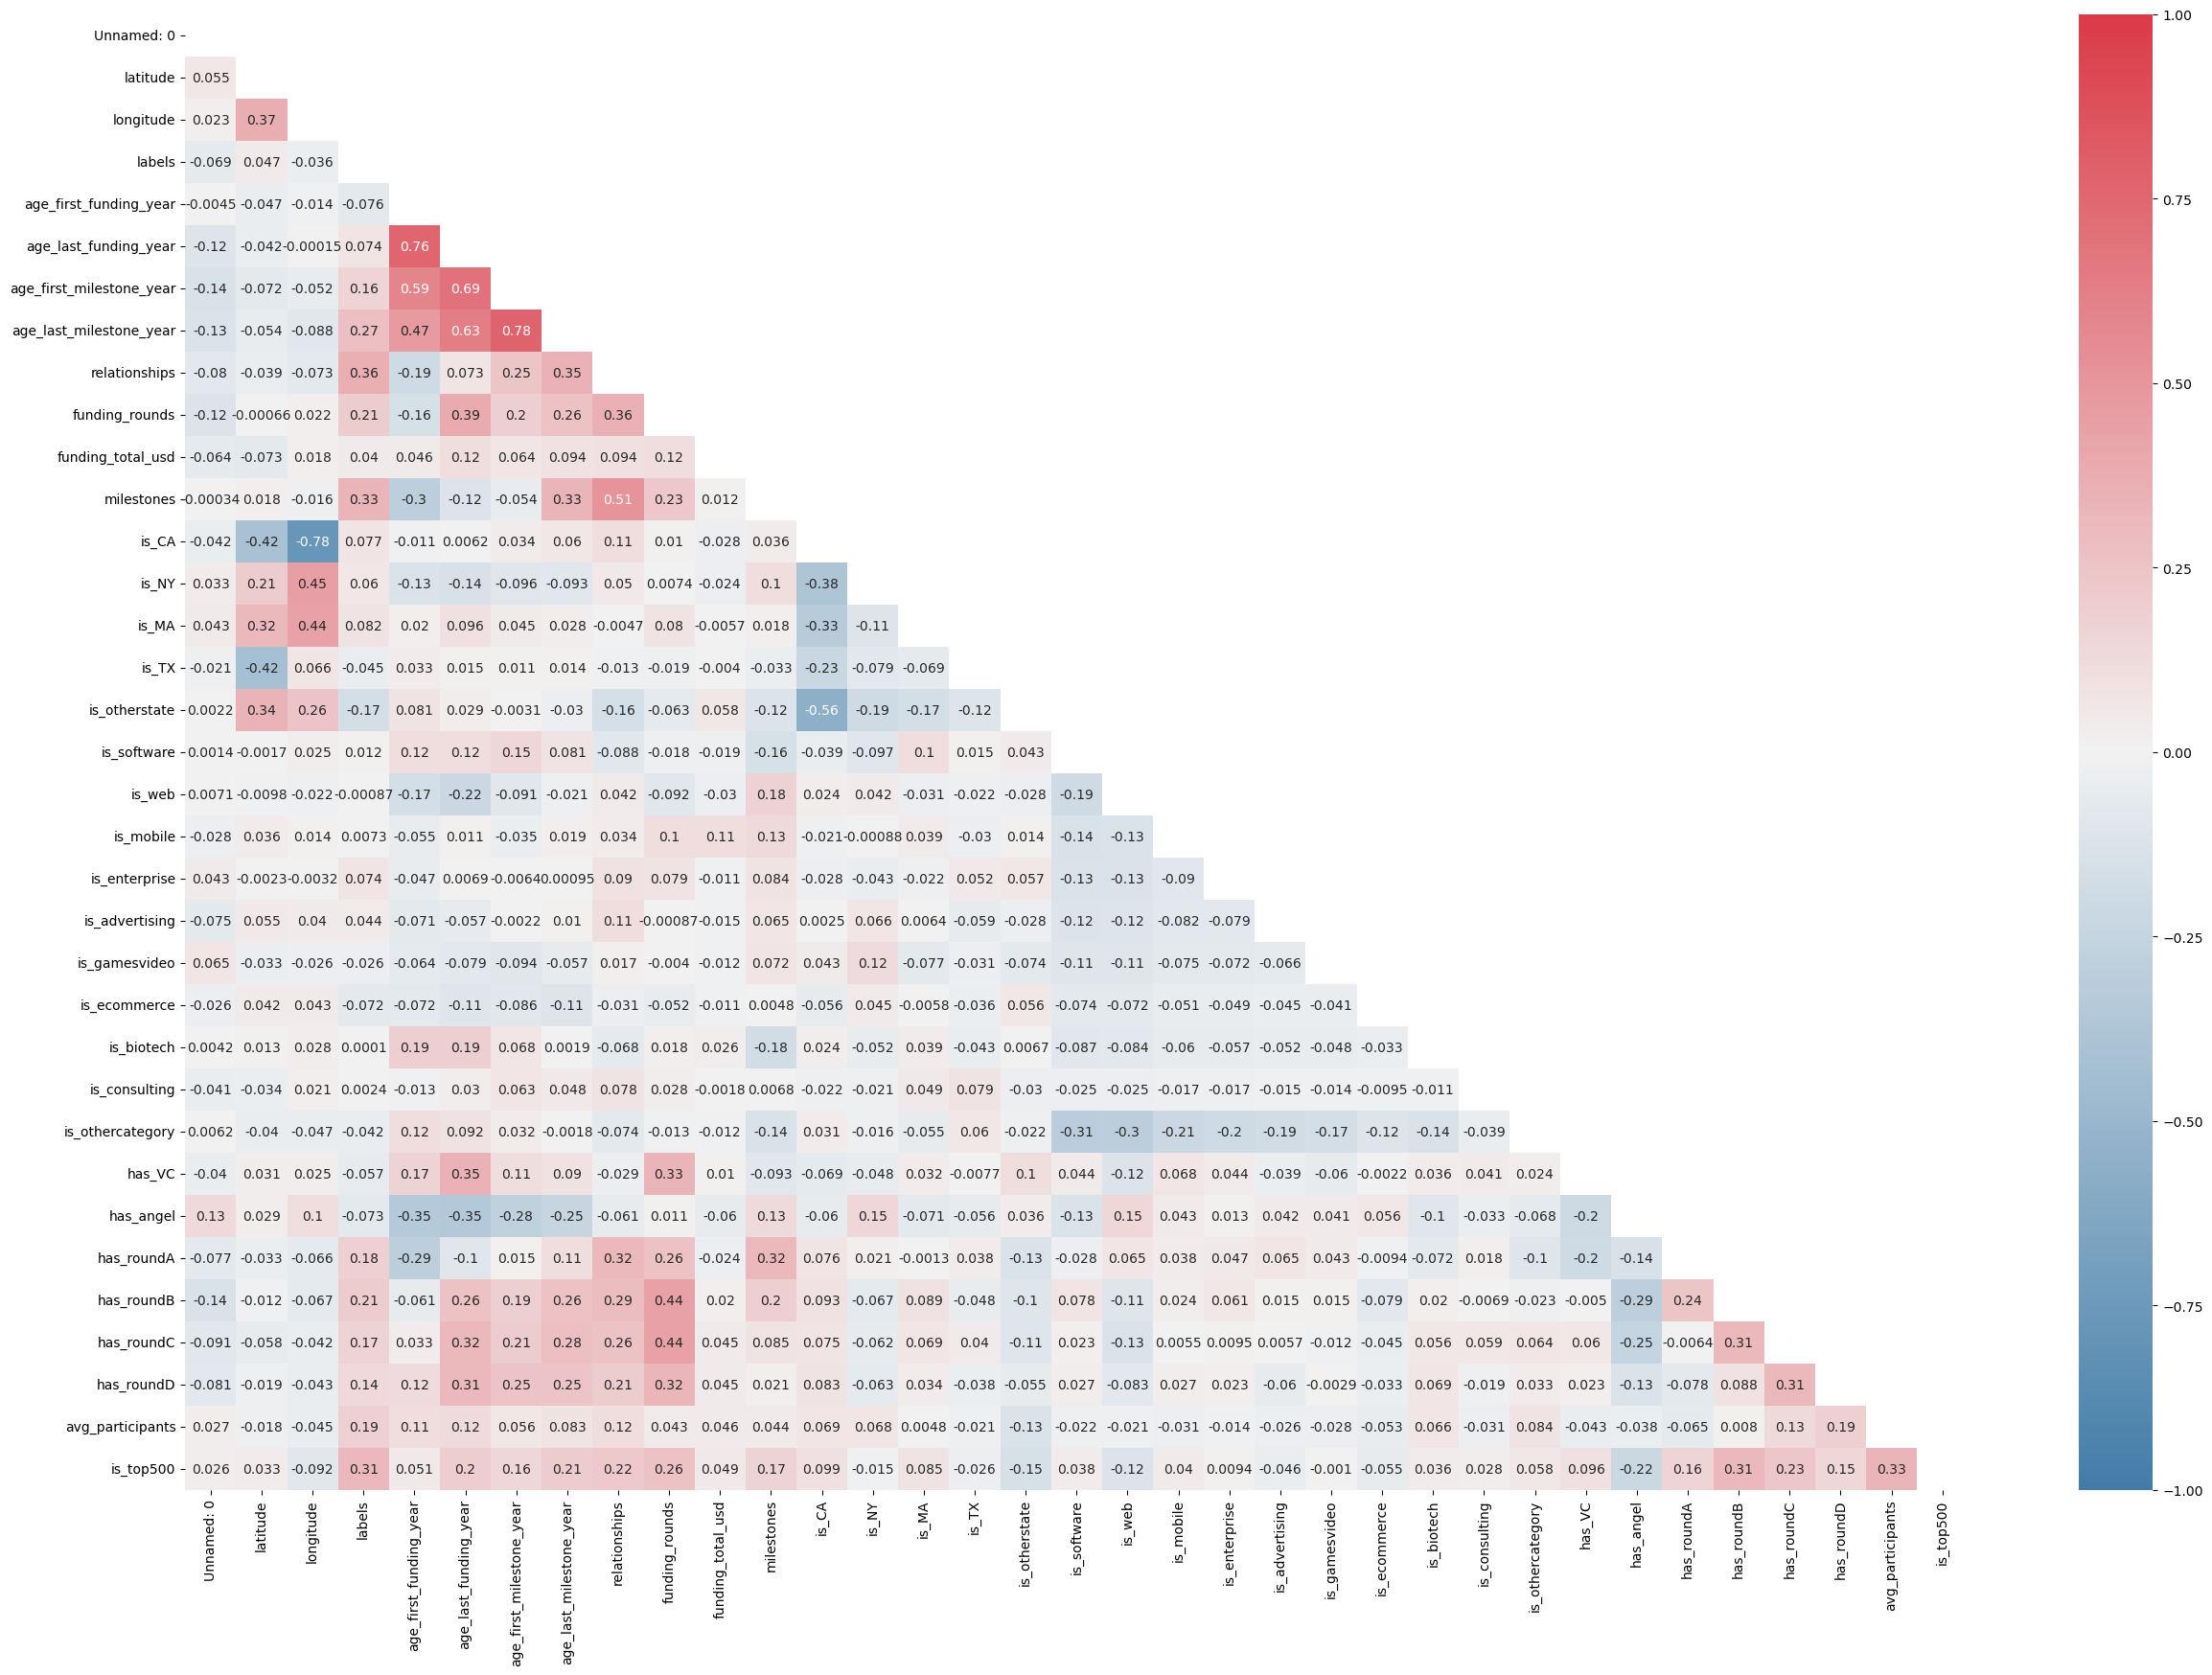

In [148]:
fig, ax = plt.subplots(figsize=(30,20))  
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,
    vmax = 1,
    cmap = cmap,
    annot = True,
);


In [60]:
# Companies created and closed #adquired = 1 // closed = 0

df['status'] = df['status'].replace(['acquired'], 1)
df['status'] = df['status'].replace(['closed'], 0)
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


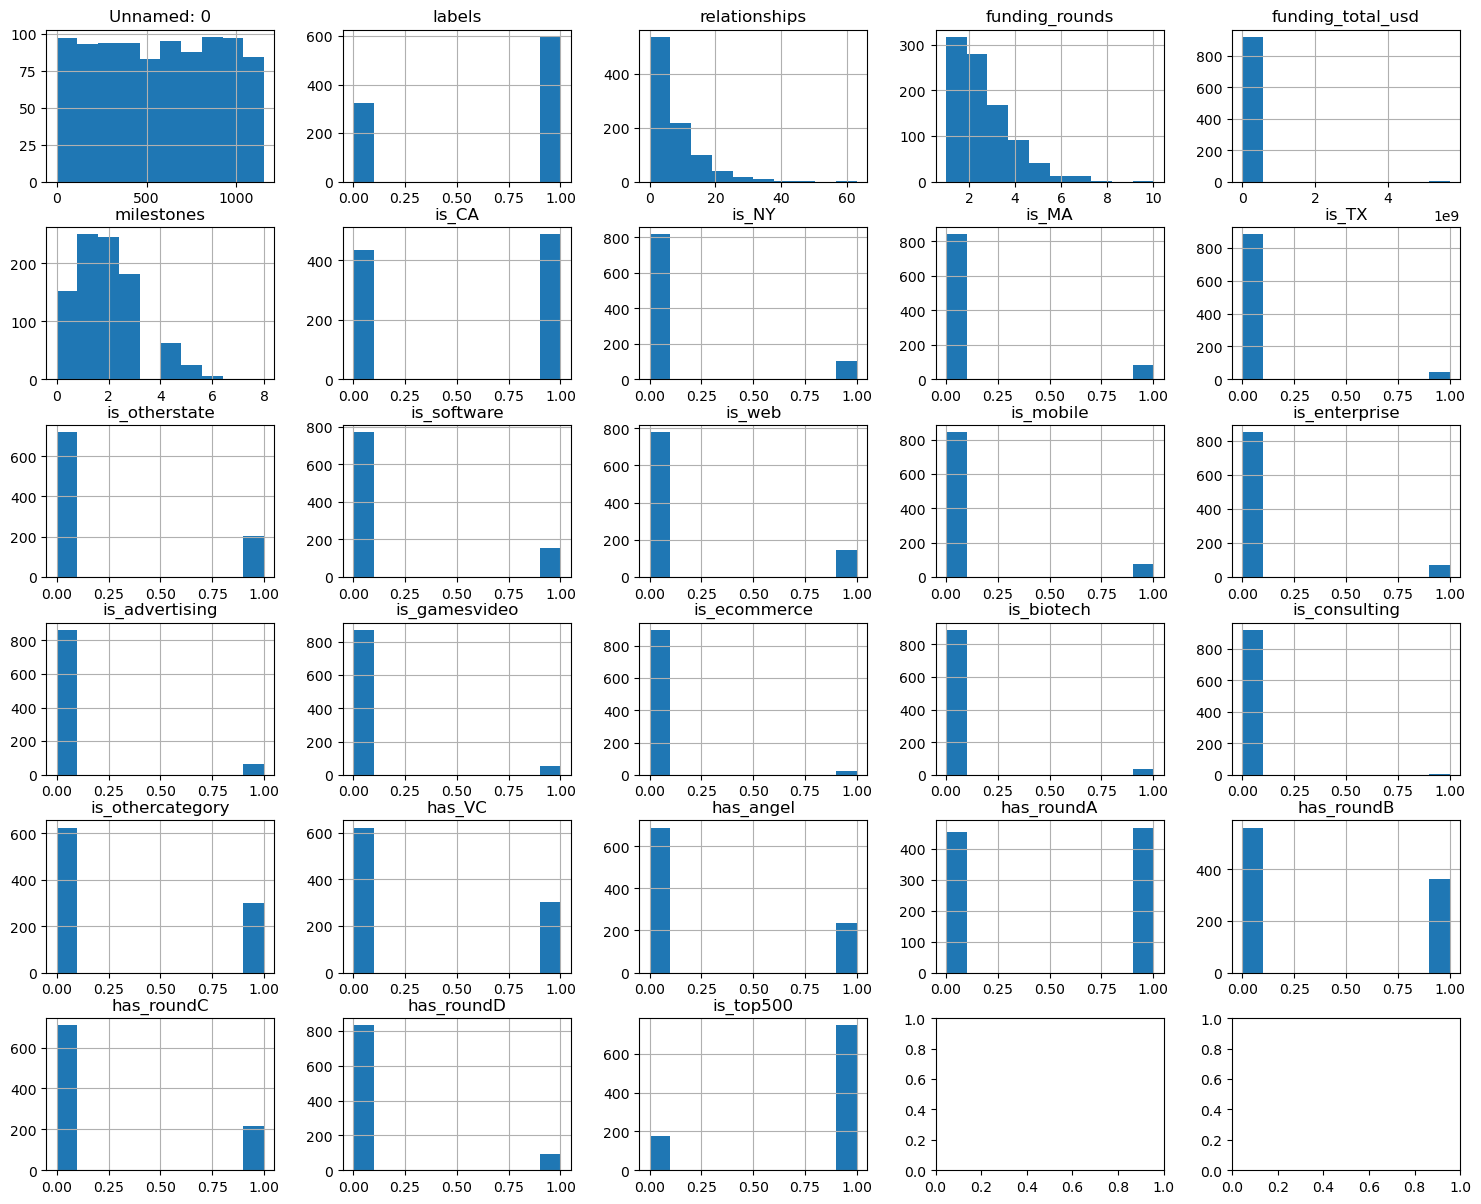

In [155]:
int_columns = [c for c in df.columns if df[c].dtype == 'int64']

fig, ax = plt.subplots(6, 5, figsize=(15, 12)) # first parameters we specify the number of rows and columns
plt.tight_layout() #without it the graphs will look squshed together (try to comment it and see the difference)

fig_row = 0
fig_col = 0

for col in int_columns:
    #print(fig_row, fig_col)
    df.hist(column=col, ax=ax[fig_row][fig_col])
    fig_col += 1
    if fig_col % 5 == 0:
        fig_col = 0
        fig_row += 1


plt.show()

In [156]:
model1 = GLM.from_formula("status ~ funding_total_usd + is_mobile + is_enterprise + is_advertising + is_gamesvideo + is_ecommerce + is_biotech + is_consulting + is_othercategory", data=df, family=Binomial())
result1 = model1.fit()
print(result1.summary())

                           Generalized Linear Model Regression Results                            
Dep. Variable:     ['status[acquired]', 'status[closed]']   No. Observations:                  923
Model:                                                GLM   Df Residuals:                      913
Model Family:                                    Binomial   Df Model:                            9
Link Function:                                      Logit   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -586.38
Date:                                    Thu, 15 Sep 2022   Deviance:                       1172.8
Time:                                            21:21:35   Pearson chi2:                 1.18e+03
No. Iterations:                                         7   Pseudo R-squ. (CS):            0.02781
Covariance Type:                                nonrobust                                         
          

In [157]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [158]:
#Ansam-Model
model2 = GLM.from_formula("status ~ milestones + relationships + has_angel + has_roundA + has_roundB + has_roundC + has_roundD", data=df_test, family=sm.families.Binomial())
result2 = model2.fit(scale='X2')
print(result3.summary())

                           Generalized Linear Model Regression Results                            
Dep. Variable:     ['status[acquired]', 'status[closed]']   No. Observations:                  923
Model:                                                GLM   Df Residuals:                      915
Model Family:                                    Binomial   Df Model:                            7
Link Function:                                      Logit   Scale:                          1.8254
Method:                                              IRLS   Log-Likelihood:                -484.08
Date:                                    Thu, 15 Sep 2022   Deviance:                       968.16
Time:                                            21:21:51   Pearson chi2:                 1.67e+03
No. Iterations:                                         8   Pseudo R-squ. (CS):             0.2211
Covariance Type:                                nonrobust                                         
          

In [159]:
#Everything ->>>
model2 = GLM.from_formula("status ~ relationships + funding_rounds + funding_total_usd + milestones + has_VC + has_angel + has_roundA + has_roundB + has_roundC + has_roundD + avg_participants + is_top500", data=df_test, family=sm.families.Binomial())
result2 = model1.fit()
print(result1.summary())

                           Generalized Linear Model Regression Results                            
Dep. Variable:     ['status[acquired]', 'status[closed]']   No. Observations:                  923
Model:                                                GLM   Df Residuals:                      913
Model Family:                                    Binomial   Df Model:                            9
Link Function:                                      Logit   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -586.38
Date:                                    Thu, 15 Sep 2022   Deviance:                       1172.8
Time:                                            21:21:54   Pearson chi2:                 1.18e+03
No. Iterations:                                         7   Pseudo R-squ. (CS):            0.02781
Covariance Type:                                nonrobust                                         
          